# Variational Gaussian Model

Comparing VI performance with different numbers of iterates for estimating the elbo.

**WARNING: The stopping rule is disabled so this notebook takes a long time to run.**

In [1]:
import math
import torch
import matplotlib.pyplot as plt

from ptvi import (sgvb, UnivariateGaussian, NullStoppingHeuristic, 
    ExponentialStoppingHeuristic)

plt.rcParams['figure.figsize'] = [12, 4]

stop_heur = NullStoppingHeuristic()
max_iter = 2**13

Simulate data, which will be common for all models. Mean and sd are shown below.

In [2]:
torch.manual_seed(123)
N, μ0, σ0 = 100, 5., 5.
true_params = {'μ': μ0, 'σ': σ0}
η0 = math.log(σ0)
model = UnivariateGaussian()
y = model.simulate(N=N, **true_params)

## Analytic entropy term

In [3]:
result = sgvb(model, y, max_iters=max_iter, num_draws=1,
              sim_entropy=False, stop_heur=stop_heur)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured ADVI for Univariate Gaussian model:
  - estimating elbo with M=1;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo =-274842.09
       1. smoothed elbo =-252522.98
       2. smoothed elbo =-227341.67
       4. smoothed elbo =-186000.70
       8. smoothed elbo =-123478.79
      16. smoothed elbo =-60200.65
      32. smoothed elbo =-14761.73
      64. smoothed elbo =-4377.82
     128. smoothed elbo =-14280.08
     256. smoothed elbo =-5198.52
     512. smoothed elbo =-2393.03
    1024. smoothed elbo = -942.80
    2048. smoothed elbo = -326.98
    4096. smoothed elbo = -299.58
    8191. smoothed elbo =     -299.56
Completed 8192 iterations in 12.4s @ 658.00 i/s.
―――

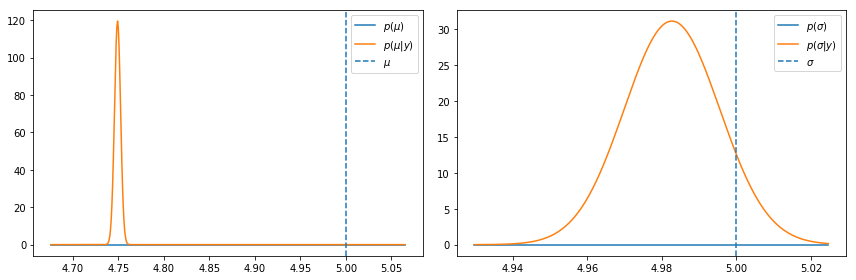

In [4]:
result.plot_global_marginals(**true_params)

## Stochastic entropy term

### elbo estimated with 1 draw

In [7]:
result_s1 = sgvb(model, y, max_iters=max_iter, num_draws=1, sim_entropy=True, stop_heur=stop_heur)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference for Univariate Gaussian model:
  - estimating elbo with M=1;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo =-1095.50
       1. smoothed elbo =-1150.87
       2. smoothed elbo =-1177.74
       4. smoothed elbo =-1364.29
       8. smoothed elbo =-1316.78
      16. smoothed elbo =-17517.29
      32. smoothed elbo =-34929.98
      64. smoothed elbo =-16953.40
     128. smoothed elbo =-2338.75
     256. smoothed elbo =-18391.98
     512. smoothed elbo =-3997.37
    1024. smoothed elbo =-1918.50
    2048. smoothed elbo = -342.36
    4096. smoothed elbo = -310.43
    8191. smoothed elbo =     -310.47
Completed 8192 iterations in 14.5s @ 563.27 i/s.
――

### elbo estimated with 10 draws

In [8]:
result_s10 = sgvb(model, y, max_iters=max_iter, num_draws=10, sim_entropy=True, stop_heur=stop_heur)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference for Univariate Gaussian model:
  - estimating elbo with M=10;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo =-7816.40
       1. smoothed elbo =-7822.55
       2. smoothed elbo =-7205.54
       4. smoothed elbo =-12240.84
       8. smoothed elbo =-12344.91
      16. smoothed elbo =-14151.85
      32. smoothed elbo =-27223.73
      64. smoothed elbo =-12541.76
     128. smoothed elbo =-10073.05
     256. smoothed elbo =-7369.54
     512. smoothed elbo =-1972.15
    1024. smoothed elbo = -330.23
    2048. smoothed elbo = -310.44
    4096. smoothed elbo = -310.44
    8191. smoothed elbo =     -310.42
Completed 8192 iterations in 107.3s @ 76.36 i/s.

### elbo estimated with 100 draws

In [9]:
result_s100 = sgvb(model, y, max_iters=max_iter, num_draws=100, sim_entropy=True, stop_heur=stop_heur)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference for Univariate Gaussian model:
  - estimating elbo with M=100;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo =-25934.30
       1. smoothed elbo =-24435.25
       2. smoothed elbo =-22977.57
       4. smoothed elbo =-21919.29
       8. smoothed elbo =-18856.50
      16. smoothed elbo =-17671.79
      32. smoothed elbo =-12027.41
      64. smoothed elbo =-10170.89
     128. smoothed elbo =-5279.87
     256. smoothed elbo =-1887.94
     512. smoothed elbo = -446.46
    1024. smoothed elbo = -317.31
    2048. smoothed elbo = -310.41
    4096. smoothed elbo = -310.42
    8191. smoothed elbo =     -310.42
Completed 8192 iterations in 1038.0s @ 7.89 i

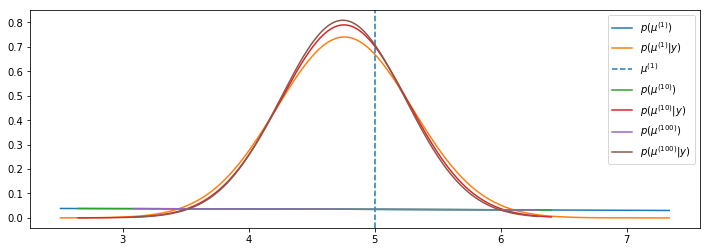

In [10]:
result_s1.plot_marg_post('μ', suffix='^{(1)}', true_val=μ0)
result_s10.plot_marg_post('μ', suffix='^{(10)}')
result_s100.plot_marg_post('μ', suffix='^{(100)}')

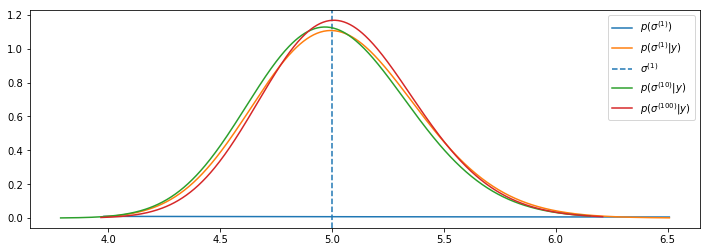

In [11]:
result_s1.plot_marg_post('σ', suffix='^{(1)}', true_val=σ0)
result_s10.plot_marg_post('σ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('σ', suffix='^{(100)}', plot_prior=False)

Putting these charts together we see that the approx marginal posteriors from ADVI are kinda ridiculous.

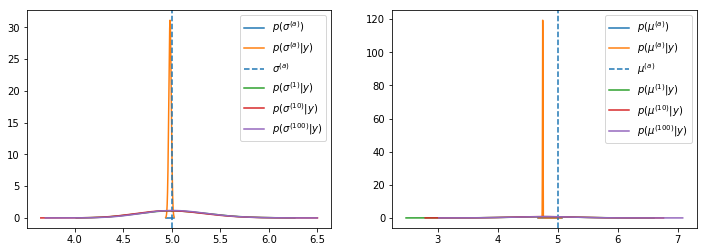

In [12]:
plt.subplot(121)
result.plot_marg_post('σ', suffix='^{(a)}', true_val=σ0)
result_s1.plot_marg_post('σ', suffix='^{(1)}', plot_prior=False)
result_s10.plot_marg_post('σ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('σ', suffix='^{(100)}', plot_prior=False)

plt.subplot(122)
result.plot_marg_post('μ', suffix='^{(a)}', true_val=μ0)
result_s1.plot_marg_post('μ', suffix='^{(1)}', plot_prior=False)
result_s10.plot_marg_post('μ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('μ', suffix='^{(100)}', plot_prior=False)